<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">PROGRAMME DE DETECTION DE FAUX BILLETS</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
#Importation de la librairie seaborn
import seaborn as sns
#Importation de la librairie pyplot
import matplotlib.pyplot as plt
#Importation de la librairie Sklearn
import sklearn as sk
from sklearn import cluster
#Importation de la librairie de l'Analyse de la composante principale
from sklearn.decomposition import PCA
#Importation de la librairie pickle
import pickle

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Programme de détection de faux billets</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Chargement du modèle d'entrainement</h3>
</div>

In [2]:
training_dict = pickle.load(open('training_model.pkl', 'rb'))
std_scale = training_dict[0]
clf = training_dict[1]
pca = training_dict[2]

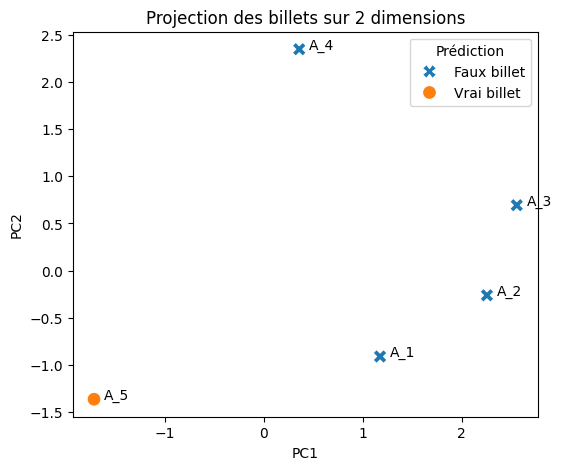

,Prédiction,Probabilité faux billet,Probabilité vrai billet,id
0,Faux billet,0.999800,1.999544e-04,A_1
1,Faux billet,0.999999,6.022760e-07,A_2
2,Faux billet,1.000000,1.951584e-07,A_3
3,Faux billet,0.816207,1.837927e-01,A_4
4,Vrai billet,0.000021,9.999793e-01,A_5


In [3]:
def detection_faux_billets(input_file):
 
    df_billets = pd.read_csv(input_file)
    X = df_billets.drop(['id'], axis=1)    
    X = pd.DataFrame(std_scale.transform(X), columns=X.columns)
    
    y = clf.predict(X)
    predictions = []
    for i in range(0, len(y)):
        predictions.append(y[i])
    
    predictions = pd.concat([
        pd.DataFrame([predictions]).rename(index={0: 'Prédiction'}).T.replace({False: 'Faux billet', True: 'Vrai billet'}),
        pd.DataFrame(clf.predict_proba(X)).rename(columns={0: 'Probabilité faux billet', 1: 'Probabilité vrai billet'})], axis=1)
    predictions['id'] = df_billets['id'].unique() 

    n_components = 2
    reduced = pca.transform(X)
    for i in range(0, n_components):
        predictions['PC' + str(i + 1)] = reduced[:, i]   
    plt.figure(figsize=(6, 5))
    ax = sns.scatterplot(data=predictions.sort_values(by=['Prédiction']), x='PC1', y='PC2', markers=['X','o'],
        hue='Prédiction', style='Prédiction', s=100)
    predictions.apply(lambda x: ax.text(x['PC1']+0.1, x['PC2'], x['id']), axis=1)

    plt.title('Projection des billets sur 2 dimensions')
    plt.show()
    
    return predictions.iloc[:,:-2]
    
detection_faux_billets('billets_production.csv')